In [17]:
# Explanation:
# 	1.	Congruential Generator:
# 	•	Implements the formula to generate pseudo-random numbers and normalizes them to  [0, 1] .
# 	2.	Kolmogorov-Smirnov Test:
# 	•	Measures the maximum absolute difference  D_n  between the empirical and theoretical CDFs.
# 	3.	DKW-Based Test:
# 	•	Uses the inequality to compute the critical threshold  \epsilon .
# 	•	Compares  D_n  to  \epsilon  to determine if the generator passes the uniformity test.
# 	4.	Plot:
# 	•	Compares the empirical CDF from generated samples to the uniform distribution’s CDF.

# Analysis
# 	•	If the test passes, the congruential generator is producing a sequence close to uniform.
# 	•	Rejection may indicate poor parameter choices ( a, b, M ) or insufficient period.

D_n: 0.0264, Epsilon: 0.0429
Test Passed


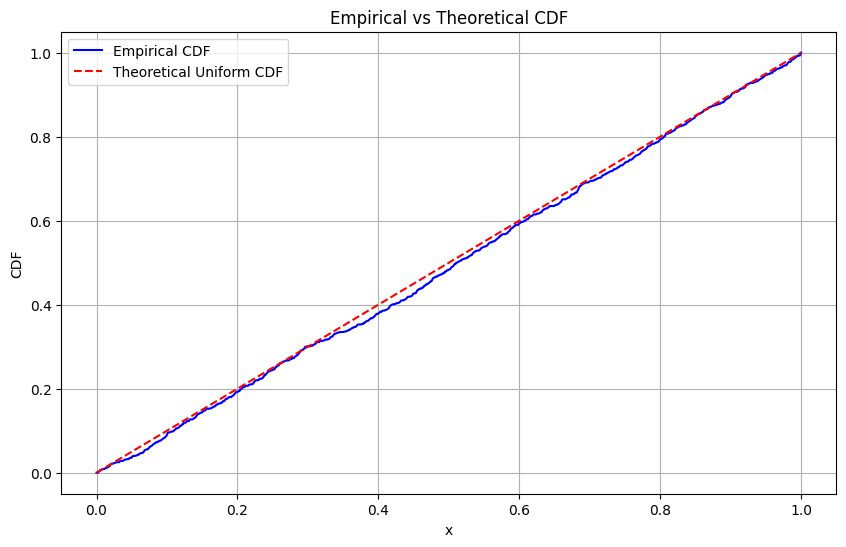

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform


# Step 1: Congruential Generator
class CongruentialGenerator:
    def __init__(self, a, b, M, seed):
        self.a = a
        self.b = b
        self.M = M
        self.state = seed

    def next(self):
        self.state = (self.a * self.state + self.b) % self.M
        return self.state / self.M

    def generate(self, n):
        return [self.next() for _ in range(n)]


# Step 2: Generate samples
def generate_uniform_samples(a, b, M, seed, n):
    generator = CongruentialGenerator(a, b, M, seed)
    return np.array(generator.generate(n))


# Step 3: Empirical CDF
def empirical_cdf(samples, x):
    return np.mean(samples <= x)


# Step 4: Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(samples):
    n = len(samples)
    sorted_samples = np.sort(samples)
    uniform_cdf = uniform.cdf(sorted_samples)
    empirical_cdf_vals = np.arange(1, n + 1) / n
    D_n = np.max(np.abs(empirical_cdf_vals - uniform_cdf))
    return D_n


# Step 5: Statistical Test using DKW
def dkw_test(D_n, n, alpha=0.05):
    epsilon = np.sqrt(-np.log(alpha / 2) / (2 * n))
    return D_n <= epsilon, epsilon


# Parameters
a, b, M, seed = 1664525, 1013904223, 2 ** 31, 42
n_samples = 1000

# Generate samples and test
samples = generate_uniform_samples(a, b, M, seed, n_samples)
D_n = kolmogorov_smirnov_test(samples)
passed, epsilon = dkw_test(D_n, n_samples)

# Print Results
print(f"D_n: {D_n:.4f}, Epsilon: {epsilon:.4f}")
print("Test Passed" if passed else "Test Failed")

# Plot the empirical vs theoretical CDF
x_vals = np.linspace(0, 1, 1000)
empirical_cdf_vals = [empirical_cdf(samples, x) for x in x_vals]
theoretical_cdf_vals = uniform.cdf(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, empirical_cdf_vals, label="Empirical CDF", color="blue")
plt.plot(x_vals, theoretical_cdf_vals, label="Theoretical Uniform CDF", color="red", linestyle="--")
plt.title("Empirical vs Theoretical CDF")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

In [19]:
# Analysis
# 	1.	Assumptions:
# 	•	The test assumes that the generated samples are independent and identically distributed (i.i.d.).
# 	•	The test is accurate as long as the generated sequence satisfies these conditions.
# 	2.	Conditions of Theorem 5.28:
# 	•	The DKW inequality requires i.i.d. samples and a bounded range.
# 	•	For normal distributions, the theoretical CDF  F(x)  is unbounded. However, practical tests approximate this by focusing on a finite range (e.g., within  \mu \pm 4\sigma ).
# 	3.	Rejection Rate:
# 	•	If the test fails, inspect the generator or the transformation method (Box-Muller) for potential inaccuracies.

D_n: 0.0230, Epsilon: 0.0429
Test Passed


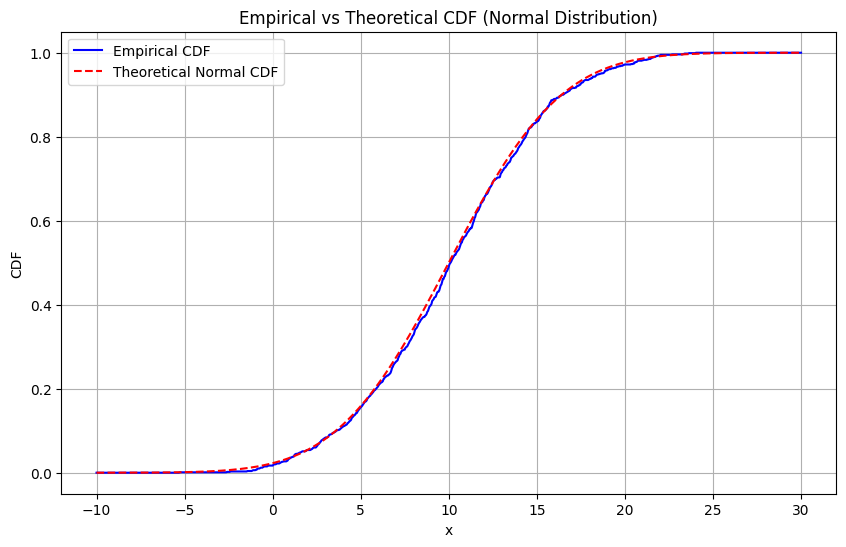

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Step 1: Box-Muller Method
def box_muller(mu, sigma, n):
    u1 = np.random.uniform(0, 1, n)
    u2 = np.random.uniform(0, 1, n)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    x = mu + sigma * z0
    y = mu + sigma * z1
    return np.concatenate([x, y])


# Step 2: Empirical CDF
def empirical_cdf(samples, x):
    return np.mean(samples <= x)


# Step 3: Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test_normal(samples, mu, sigma):
    n = len(samples)
    sorted_samples = np.sort(samples)
    theoretical_cdf = norm.cdf(sorted_samples, loc=mu, scale=sigma)
    empirical_cdf_vals = np.arange(1, n + 1) / n
    D_n = np.max(np.abs(empirical_cdf_vals - theoretical_cdf))
    return D_n


# Step 4: Statistical Test using DKW
def dkw_test(D_n, n, alpha=0.05):
    epsilon = np.sqrt(-np.log(alpha / 2) / (2 * n))
    return D_n <= epsilon, epsilon


# Parameters
mu, sigma = 10, 5
n_samples = 1000

# Generate samples and test
samples = box_muller(mu, sigma, n_samples // 2)  # Generates n_samples total
D_n = kolmogorov_smirnov_test_normal(samples, mu, sigma)
passed, epsilon = dkw_test(D_n, n_samples)

# Print Results
print(f"D_n: {D_n:.4f}, Epsilon: {epsilon:.4f}")
print("Test Passed" if passed else "Test Failed")

# Plot the empirical vs theoretical CDF
x_vals = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
empirical_cdf_vals = [empirical_cdf(samples, x) for x in x_vals]
theoretical_cdf_vals = norm.cdf(x_vals, loc=mu, scale=sigma)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, empirical_cdf_vals, label="Empirical CDF", color="blue")
plt.plot(x_vals, theoretical_cdf_vals, label="Theoretical Normal CDF", color="red", linestyle="--")
plt.title("Empirical vs Theoretical CDF (Normal Distribution)")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

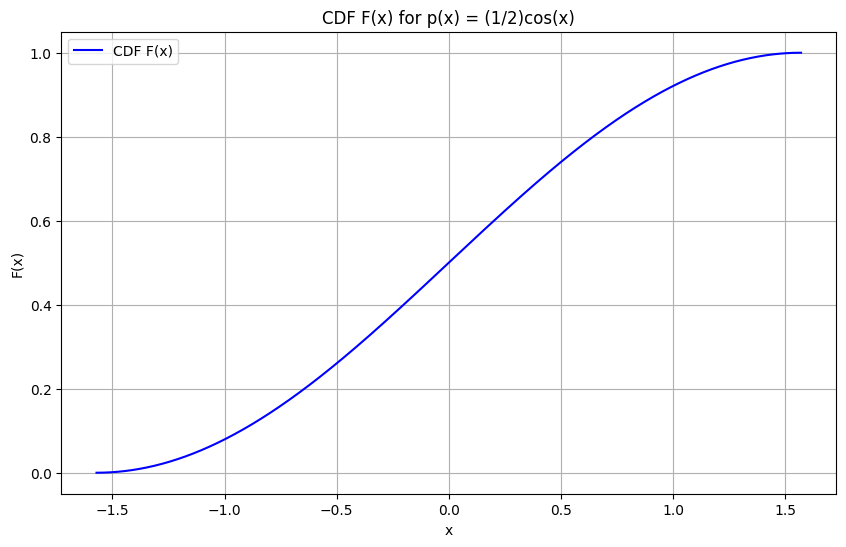

Rejection rate in Accept-Reject sampling: 0.3626


In [21]:
import numpy as np
import matplotlib.pyplot as plt


# Density function
def p(x):
    return 0.5 * np.cos(x)


# CDF
def F(x):
    return 0.5 * (np.sin(x) + 1)


# Inverse CDF
def F_inverse(u):
    return np.arcsin(2 * u - 1)


# Proposal density: Uniform([-pi/2, pi/2])
def q(x):
    return 1 / np.pi if -np.pi / 2 <= x <= np.pi / 2 else 0


# Accept-Reject Sampler
def accept_reject_sampler(n_samples):
    M = np.pi / 2  # Maximum value of p(x) / q(x)
    samples = []
    rejected = 0

    while len(samples) < n_samples:
        x = np.random.uniform(-np.pi / 2, np.pi / 2)  # Sample from q(x)
        u = np.random.uniform(0, 1)
        if u <= p(x) / (M * q(x)):
            samples.append(x)
        else:
            rejected += 1

    return np.array(samples), rejected


# Generate samples using inversion sampling
n_samples = 10000
u = np.random.uniform(0, 1, n_samples)
inversion_samples = F_inverse(u)

# Generate samples using Accept-Reject
ar_samples, rejected = accept_reject_sampler(n_samples)
rejection_rate = rejected / (rejected + n_samples)

# Plot the CDF
x = np.linspace(-np.pi / 2, np.pi / 2, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, F(x), label="CDF F(x)", color="blue")
plt.title("CDF F(x) for p(x) = (1/2)cos(x)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid()
plt.show()

# Print Results
print(f"Rejection rate in Accept-Reject sampling: {rejection_rate:.4f}")